In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import glob
import wradlib as wrl
import cartopy
import cartopy.crs as ccrs
import sys
import pandas

/tmp/ipykernel_1052/2703972766.py:29: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False,
/tmp/ipykernel_1052/2703972766.py:29: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False,
/tmp/ipykernel_1052/2703972766.py:29: DtypeWarning: Columns (1,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False,


2023.0
9
8
24
9
7
24
(801, 801)


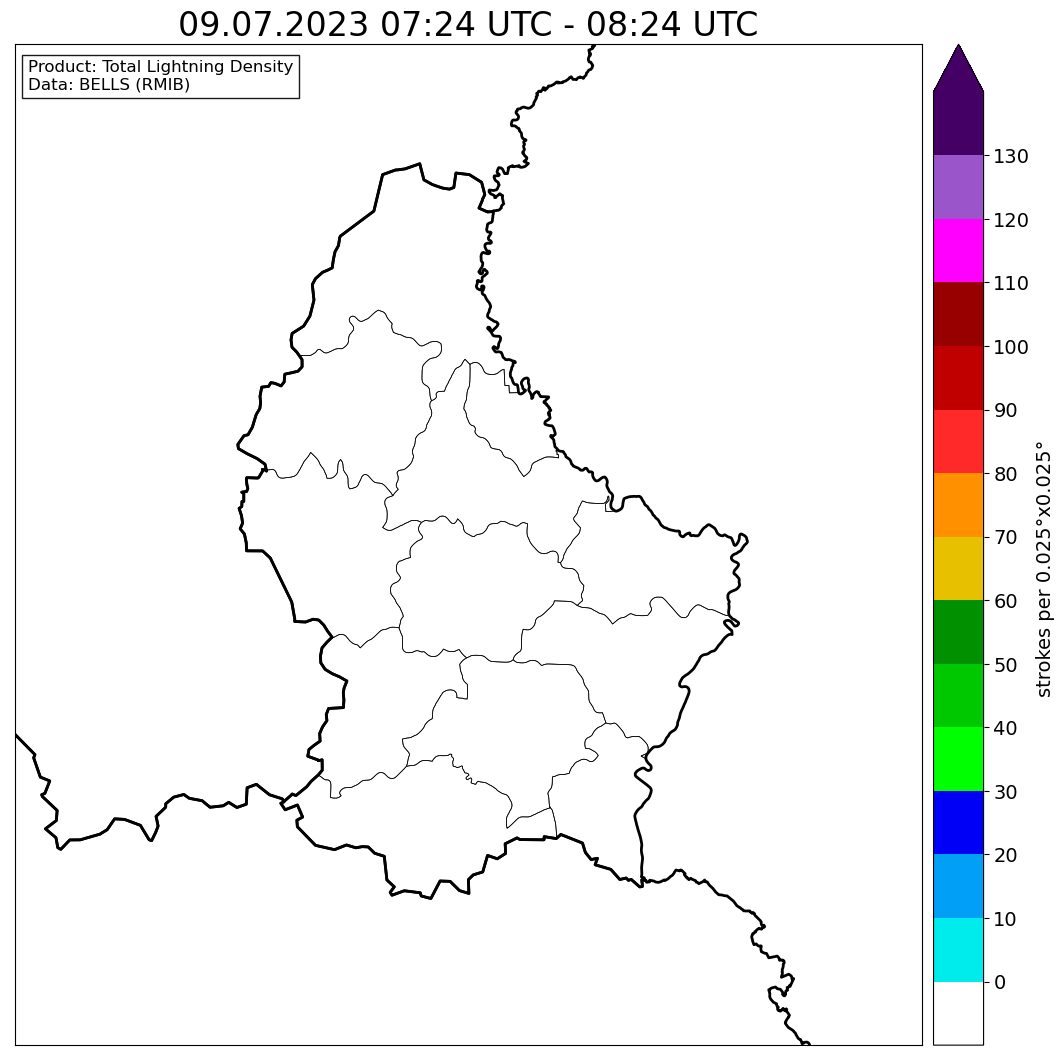

In [11]:
file_dir = '/home/lmathias'

# Changing the directory
os.chdir(file_dir)

lat = []
lon = []
lat_f = []
lon_f = []
typ = []
year =[]
month=[]
day=[]
hour=[]
minute=[]
second=[]

# with open('bells_data_20210604_1.ualf2') as DataFile:
#     data = csv.reader(DataFile,delimiter='\t')
#     for row in data:
#         if len(row)==33 and row[0]==2:
#             print(row[1])
#             year.append(row[2])
#             month.append(row[3])
#             day.append(row[4])
#             hour.append(row[5])
#             minute.append(row[6])
try:
    df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False, 
                         warn_bad_lines=False, header=None)
    #print(df[2].values.tolist())

    year.append(df[2].values)
    year = np.array(year)
    month.append(df[3].values)
    month = np.array(month)
    day.append(df[4].values)
    day = np.array(day)
    hour.append(df[5].values)
    hour =np.array(hour)
    minute.append(df[6].values)
    minute = np.array(minute)
    print(year.take(-1))

    from datetime import datetime, timedelta
    date = datetime(int(year.take(-1)), int(month.take(-1)), int(day.take(-1)), int(hour.take(-1)), 
                    int(minute.take(-1)))-timedelta(hours=0, minutes=0)
    date2 = datetime(int(year.take(-1)), int(month.take(-1)), int(day.take(-1)), int(hour.take(-1)), 
                    int(minute.take(-1)))-timedelta(hours=1, minutes=0)
    print(str(date.day))
    print(str(date.hour))
    print(str(date.minute))
    print(str(date2.day))
    print(str(date2.hour))
    print(str(date2.minute))

    size = np.size(year)

    lat.append(df[9].values)
    lat = np.array(lat)
    lon.append(df[10].values)
    lon = np.array(lon)
    typ.append(df[26].values)
    typ = np.array(typ)
    #print(date2.hour)

    lat_f = []
    lon_f = []
    typ_f = []

    for i in range(size):
        if day[0,i] == date2.day and month[0,i] == date2.month and hour[0,i] == date2.hour and minute[0,i] >= date2.minute:
            #print('ok')
            lat_f.append(lat[0,i])
            lon_f.append(lon[0,i])
            typ_f.append(typ[0,i])
        if day[0,i] == date.day and month[0,i] == date.month and hour[0,i] == date.hour and minute[0,i] <= date.minute:
            #print('ok')
            lat_f.append(lat[0,i])
            lon_f.append(lon[0,i])
            typ_f.append(typ[0,i])
    #     if hour[0,i] == str(date.hour) and minute[0,i] <= str(date.minute):
    #         lat.append(df[9].values)
    #         lon.append(df[10].values)
    #         typ.append(df[26].values)

    # lat = np.array(lat)
    # lon = np.array(lon)
    #print(lon_n)

    # lat_f = [float(i) if '.' in i else int(i) for i in lat]
    #lon_f = [float(i) if '.' in i else int(i) for i in lon]

    # #print(lat_f)

    # Definition of the map projection
    bmaplux = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
                       llcrnrlon=5.4, llcrnrlat=49.3,urcrnrlon=6.8,urcrnrlat=50.3)
    bmapeu = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
                       llcrnrlon=1, llcrnrlat=48.25,urcrnrlon=8.25,urcrnrlat=52)

    x, y = bmapeu(lon_f,lat_f)
    # size = np.size(typ_f)

    mtyp = ['^' if i == '1' else 's' for i in typ_f]
    
    file_dir = '/home/lmathias/Documents/bells'

    # Changing the directory
    os.chdir(file_dir)

    nbins = 801 # 801=0.025°, 401=0.05°, 2001=0.01°
    lon_bins = np.linspace(0, 20, nbins)
    lat_bins = np.linspace(40, 60, nbins)

    #print(lat_bins)

    density, _, _ = np.histogram2d(lat_f, lon_f, [lat_bins, lon_bins])
    lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
    density = np.where(density<=0, -10, density)


    # convert the bin mesh to map coordinates:
    xs, ys = bmaplux(lon_bins_2d, lat_bins_2d)
    print(np.shape(xs))

    cmap = plt.get_cmap('CMRmap_r')
    newcmap = ListedColormap(cmap(np.linspace(0, 0.9, 44)))

    colors=[(1,1,1),(0.0, 0.9254901960784314, 0.9254901960784314), 
                            (0.00392156862745098, 0.6274509803921569, 0.9647058823529412), 
                            (0.0, 0.0, 0.9647058823529412), 
                            (0.0, 1.0, 0.0), 
                            (0.0, 0.7843137254901961, 0.0), 
                            (0.0, 0.5647058823529412, 0.0), 
                            (1.0, 1.0, 0.0), 
                            (0.9058823529411765, 0.7529411764705882, 0.0), 
                            (1.0, 0.5647058823529412, 0.0), 
                            (1.0, 0.16078431372, 0.16078431372), 
                            (0.7529411764705882, 0.0, 0.0),
                            (0.59765625, 0.0, 0.0), 
                            (1.0, 0.0, 1.0), 
                            (0.6, 0.3333333333333333, 0.788235294117647),
                             (0.27,0,0.4)]
    colors2 = [(1,1,1),
              (0.953,0.882,0.882),
              (0.933,0.784,0.792),
              (0.906,0.686,0.694),
              (0.871,0.584,0.592),
              (0.831,0.478,0.494),
              (0.784,0.369,0.388),
              (0.729,0.251,0.278),
              (0.643,0.141,0.184),
              (0.525,0.075,0.122),
              (0.412,0.000,0.047)]


    cmap1 = ListedColormap(colors)
    cmap2 = ListedColormap(colors2)
    newcmap = ListedColormap(cmap1(np.linspace(0, 1, 15)))

    fig1,ax = plt.subplots(figsize=(15,13))
    #bmaplux.drawcountries(linewidth=2)
    #bmaplux.drawcoastlines(linewidth=2)
    #bmaplux.drawparallels(np.arange(-75,75,1))
    #bmapeu.drawmeridians(np.arange(0,360,1))
    bmaplux.readshapefile('gadm36_LUX_2','gadm36_LUX_2')
    bmaplux.readshapefile('gadm36_LUX_0','gadm36_LUX_0',linewidth=2)
    bmaplux.readshapefile('gadm36_FRA_0','gadm36_FRA_0',linewidth=2)
    bmaplux.readshapefile('gadm36_BEL_0','gadm36_BEL_0',linewidth=2)
    #bmapeu.plot(x,y,'ro',markersize=3, label='')

    # for xp, yp, h, m in zip(x, y, hour, mtyp):
    #         ax.scatter([xp], [yp], marker=m, color = 'red')

    pm = bmaplux.pcolormesh(xs, ys, density, ax=ax, vmin=-10, vmax=140, cmap=newcmap)
    #pm = bmaplux.contourf(xs[0:nbins-1,0:nbins-1], ys[0:nbins-1,0:nbins-1], density, ax=ax,  levels=np.arange(-10,120,10), cmap=newcmap)
    cb = plt.colorbar(pm, ax=ax, ticks=(0,10,20,30,40,50,60,70,80,90,100,110,120,130), shrink=1, pad=0.01, extend='max', orientation='vertical')
    cb.set_label("strokes per 0.025°x0.025°",fontsize=14)
    cb.ax.tick_params(labelsize=14)

    plt.title(date2.strftime("%d.%m.%Y %H:%M UTC")+date.strftime(" - %H:%M UTC") ,fontsize=24)
    t=plt.gcf().text(0.18, 0.845, 'Product: Total Lightning Density\nData: BELLS (RMIB)', fontsize=12)
    t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

    file = 'bells_density_latest.jpeg'
    #print(file)
    plt.savefig(file, bbox_inches='tight')
    
except:
    print('no lightning data available')
    bmaplux = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
                       llcrnrlon=5.4, llcrnrlat=49.3,urcrnrlon=6.8,urcrnrlat=50.3)
    file_dir = '/home/lmathias/Documents/bells'
    os.chdir(file_dir)
    fig1,ax = plt.subplots(figsize=(15,13))
    #bmaplux.drawcountries(linewidth=2)
    #bmaplux.drawcoastlines(linewidth=2)
    #bmaplux.drawparallels(np.arange(-75,75,1))
    #bmapeu.drawmeridians(np.arange(0,360,1))
    bmaplux.readshapefile('gadm36_LUX_2','gadm36_LUX_2')
    bmaplux.readshapefile('gadm36_LUX_0','gadm36_LUX_0',linewidth=2)
    bmaplux.readshapefile('gadm36_FRA_0','gadm36_FRA_0',linewidth=2)
    bmaplux.readshapefile('gadm36_BEL_0','gadm36_BEL_0',linewidth=2)
    #bmapeu.plot(x,y,'ro',markersize=3, label='')
    t=plt.gcf().text(0.26, 0.545, 'The BELLS network currently does\nnot detect any lightning activity!', fontsize=32)
    t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))
    file = 'bells_density_latest.jpeg'
    #print(file)
    plt.savefig(file, bbox_inches='tight')

    # for xp, yp, h, m in zip(x, y, hour, mtyp):
    #         ax.scatter([xp], [yp], marker=m, color = 'red')

/tmp/ipykernel_1052/127959114.py:30: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False,
/tmp/ipykernel_1052/127959114.py:30: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False,
/tmp/ipykernel_1052/127959114.py:30: DtypeWarning: Columns (1,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False,


2023.0
9
8
24
9
7
24
(801, 801)
bells_density_large_latest.jpeg


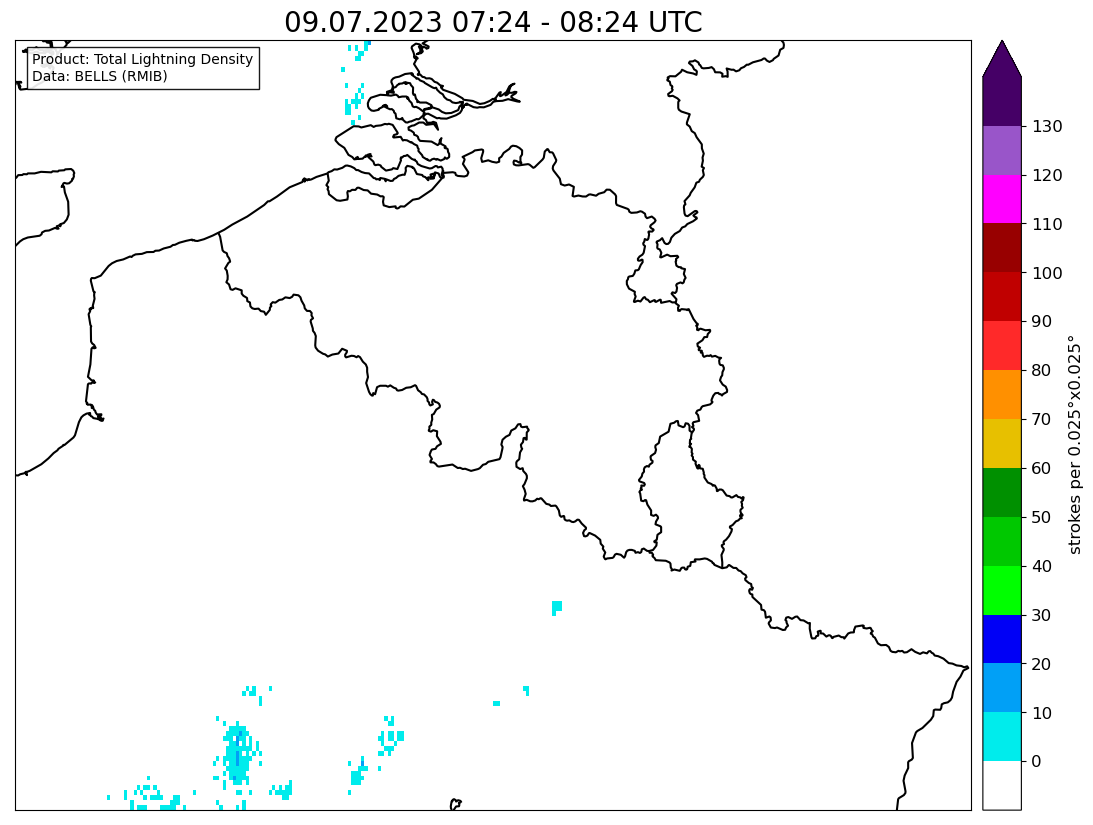

In [10]:
file_dir = '/home/lmathias/'

# Changing the directory
os.chdir(file_dir)

lat = []
lon = []
lat_f = []
lon_f = []
typ = []
year =[]
month=[]
day=[]
hour=[]
minute=[]
second=[]

# with open('bells_data_20210604_1.ualf2') as DataFile:
#     data = csv.reader(DataFile,delimiter='\t')
#     for row in data:
#         if len(row)==33 and row[0]==2:
#             print(row[1])
#             year.append(row[2])
#             month.append(row[3])
#             day.append(row[4])
#             hour.append(row[5])
#             minute.append(row[6])


df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False, 
                     warn_bad_lines=False, header=None)
#print(df[2].values.tolist())

year.append(df[2].values)
year = np.array(year)
month.append(df[3].values)
month = np.array(month)
day.append(df[4].values)
day = np.array(day)
hour.append(df[5].values)
hour =np.array(hour)
minute.append(df[6].values)
minute = np.array(minute)
print(year.take(-1))

from datetime import datetime, timedelta
date = datetime(int(year.take(-1)), int(month.take(-1)), int(day.take(-1)), int(hour.take(-1)), 
                int(minute.take(-1)))-timedelta(hours=0, minutes=0)
date2 = datetime(int(year.take(-1)), int(month.take(-1)), int(day.take(-1)), int(hour.take(-1)), 
                int(minute.take(-1)))-timedelta(hours=1, minutes=0)
print(str(date.day))
print(str(date.hour))
print(str(date.minute))
print(str(date2.day))
print(str(date2.hour))
print(str(date2.minute))

size = np.size(year)

lat.append(df[9].values)
lat = np.array(lat)
lon.append(df[10].values)
lon = np.array(lon)
typ.append(df[26].values)
typ = np.array(typ)
#print(date2.hour)

lat_f = []
lon_f = []
typ_f = []

for i in range(size):
    if day[0,i] == date2.day and month[0,i] == date2.month and hour[0,i] == date2.hour and minute[0,i] >= date2.minute:
        #print('ok')
        lat_f.append(lat[0,i])
        lon_f.append(lon[0,i])
        typ_f.append(typ[0,i])
    if day[0,i] == date.day and month[0,i] == date.month and hour[0,i] == date.hour and minute[0,i] <= date.minute:
        #print('ok')
        lat_f.append(lat[0,i])
        lon_f.append(lon[0,i])
        typ_f.append(typ[0,i])
#     if hour[0,i] == str(date.hour) and minute[0,i] <= str(date.minute):
#         lat.append(df[9].values)
#         lon.append(df[10].values)
#         typ.append(df[26].values)

# lat = np.array(lat)
# lon = np.array(lon)
#print(lon_n)

# lat_f = [float(i) if '.' in i else int(i) for i in lat]
#lon_f = [float(i) if '.' in i else int(i) for i in lon]

# #print(lat_f)

# Definition of the map projection
#bmaplux = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
                   #llcrnrlon=5.4, llcrnrlat=49.3,urcrnrlon=6.8,urcrnrlat=50.3)
bmapeu = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
                   llcrnrlon=1, llcrnrlat=48.25,urcrnrlon=8.25,urcrnrlat=52)

x, y = bmapeu(lon_f,lat_f)
# size = np.size(typ_f)

mtyp = ['^' if i == '1' else 's' for i in typ_f]

file_dir = '/home/lmathias/Documents/bells/'

# Changing the directory
os.chdir(file_dir)

nbins = 801 # 801=0.025°, 401=0.05°, 2001=0.01°
lon_bins = np.linspace(0, 20, nbins)
lat_bins = np.linspace(40, 60, nbins)

#print(lat_bins)

density, _, _ = np.histogram2d(lat_f, lon_f, [lat_bins, lon_bins])
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
density = np.where(density<=0, -10, density)


# convert the bin mesh to map coordinates:
xs, ys = bmapeu(lon_bins_2d, lat_bins_2d)
print(np.shape(xs))

cmap = plt.get_cmap('CMRmap_r')
newcmap = ListedColormap(cmap(np.linspace(0, 0.9, 44)))

colors=[(1,1,1),(0.0, 0.9254901960784314, 0.9254901960784314), 
                        (0.00392156862745098, 0.6274509803921569, 0.9647058823529412), 
                        (0.0, 0.0, 0.9647058823529412), 
                        (0.0, 1.0, 0.0), 
                        (0.0, 0.7843137254901961, 0.0), 
                        (0.0, 0.5647058823529412, 0.0), 
                        (1.0, 1.0, 0.0), 
                        (0.9058823529411765, 0.7529411764705882, 0.0), 
                        (1.0, 0.5647058823529412, 0.0), 
                        (1.0, 0.16078431372, 0.16078431372), 
                        (0.7529411764705882, 0.0, 0.0),
                        (0.59765625, 0.0, 0.0), 
                        (1.0, 0.0, 1.0), 
                        (0.6, 0.3333333333333333, 0.788235294117647),
                         (0.27,0,0.4)]
colors2 = [(1,1,1),
          (0.953,0.882,0.882),
          (0.933,0.784,0.792),
          (0.906,0.686,0.694),
          (0.871,0.584,0.592),
          (0.831,0.478,0.494),
          (0.784,0.369,0.388),
          (0.729,0.251,0.278),
          (0.643,0.141,0.184),
          (0.525,0.075,0.122),
          (0.412,0.000,0.047)]


cmap1 = ListedColormap(colors)
cmap2 = ListedColormap(colors2)
newcmap = ListedColormap(cmap1(np.linspace(0, 1, 15)))

fig1,ax = plt.subplots(figsize=(15,10))
bmapeu.drawcountries(linewidth=1.5)
bmapeu.drawcoastlines(linewidth=1.5)
#bmaplux.drawcountries(linewidth=2)
#bmaplux.drawcoastlines(linewidth=2)
#bmaplux.drawparallels(np.arange(-75,75,1))
#bmapeu.drawmeridians(np.arange(0,360,1))
#bmaplux.readshapefile('gadm36_LUX_2','gadm36_LUX_2')
#bmaplux.readshapefile('gadm36_LUX_0','gadm36_LUX_0',linewidth=2)
#bmaplux.readshapefile('gadm36_FRA_0','gadm36_FRA_0',linewidth=2)
#bmaplux.readshapefile('gadm36_BEL_0','gadm36_BEL_0',linewidth=2)
#bmapeu.plot(x,y,'ro',markersize=3, label='')

# for xp, yp, h, m in zip(x, y, hour, mtyp):
#         ax.scatter([xp], [yp], marker=m, color = 'red')

cities = [["Paris","P"],
      ["Brussels","B"],
      ["Luxembourg-City","L"],
      ["Cologne","C"]]

# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="smy-application")
# for (city,count) in cities:
#     loc = geolocator.geocode(city)
#     x, y = bmapeu(loc.longitude, loc.latitude)
#     bmapeu.plot(x,y,marker='o',color='Black',markersize=3)
#     ax.annotate(count, bmapeu(loc.longitude+.05, loc.latitude),color='black',fontsize=14)

pm = bmapeu.pcolormesh(xs, ys, density, ax=ax, vmin=-10, vmax=140, cmap=newcmap)
#pm = bmapeu.contourf(xs[0:nbins-1,0:nbins-1], ys[0:nbins-1,0:nbins-1], density, ax=ax,  levels=np.arange(-10,120,10), cmap=newcmap)
cb = plt.colorbar(pm, ax=ax, ticks=(0,10,20,30,40,50,60,70,80,90,100,110,120,130), shrink=1, pad=0.01, orientation='vertical',extend='max')
cb.set_label("strokes per 0.025°x0.025°",fontsize=12)
cb.ax.tick_params(labelsize=12)

plt.title(date2.strftime("%d.%m.%Y %H:%M")+date.strftime(" - %H:%M UTC") ,fontsize=20)
t=plt.gcf().text(0.15, 0.84, 'Product: Total Lightning Density\nData: BELLS (RMIB)', fontsize=10)
t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

file = 'bells_density_large_latest.jpeg'
print(file)
plt.savefig(file, bbox_inches='tight',dpi=100)

# except:
#     print('no lightning data available')
#     bmapeu = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
#                       llcrnrlon=1, llcrnrlat=48.25,urcrnrlon=8.25,urcrnrlat=52)
#     file_dir = '/home/lmathias/Documents/bells/'
#     os.chdir(file_dir)
#     fig1,ax = plt.subplots(figsize=(15,10))
#     bmapeu.drawcountries(linewidth=1.5)
#     bmapeu.drawcoastlines(linewidth=1.5)
#     #bmaplux.drawparallels(np.arange(-75,75,1))
#     #bmapeu.drawmeridians(np.arange(0,360,1))
#     #bmaplux.readshapefile('gadm36_LUX_2','gadm36_LUX_2')
#     #bmaplux.readshapefile('gadm36_LUX_0','gadm36_LUX_0',linewidth=2)
#     #bmaplux.readshapefile('gadm36_FRA_0','gadm36_FRA_0',linewidth=2)
#     #bmaplux.readshapefile('gadm36_BEL_0','gadm36_BEL_0',linewidth=2)
#     #bmapeu.plot(x,y,'ro',markersize=3, label='')
#     t=plt.gcf().text(0.26, 0.545, 'The BELLS network currently does\nnot detect any lightning activity!', fontsize=32)
#     t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))
#     file = 'bells_density_large_latest.jpeg'
#     print(file)
#     plt.savefig(file, bbox_inches='tight', dpi=100)